In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler
from hipe4ml.analysis_utils import train_test_generator
from hipe4ml import plot_utils

In [ ]:
import random
random_number = round(random.uniform(0, 10))
print(random_number)

In [2]:
dataH= TreeHandler('mergedAnalysisResults_child1_PID_geometry.root', 'treeMLLc_new')

In [ ]:
dataH.write_df_to_root_files()

In [ ]:
dataH=TreeHandler()

In [ ]:
dataH.get_handler_from_large_file('mergedAnalysisResults_final_PID_geometry.root', 'treeMLLc_new')

In [ ]:
dataH= TreeHandler('newAnalysisResults_0_10.root', 'treeMLLc_new')

In [ ]:
dataH= TreeHandler('newAnalysisResults_10_60.root', 'treeMLLc_new')

In [ ]:
dataH2= TreeHandler('newAnalysisResults_60_100.root', 'treeMLLc_new')

In [3]:
promptH = TreeHandler('mergedAnalysisResults_MC_signal_all_var.root', 'treeMLLc_new').get_subset('pt_cand>1 and pt_cand<2')

In [ ]:
promptH1 = TreeHandler('mergedAnalysisResults_MC_signalbackground_all_var.root','treeMLLc_new').get_subset('pt_cand>1 and pt_cand<2')

In [4]:
bkgH = dataH.get_subset('(2.32 < inv_mass<2.45 or 2.1<inv_mass < 2.25)',size=promptH.get_n_cand()*3)
print(promptH.get_n_cand())
print(bkgH.get_n_cand())

88113
264339


In [5]:
train_test_data = train_test_generator([promptH, bkgH], [1,0], test_size=0.4, random_state=48)

In [6]:
# Get the names of all variables in the tree using TreeHandler's get_var_names method
vars_to_draw = bkgH.get_var_names()
#indices_to_keep = [1,2,3,4,5,6,7,8,9,14,15,16,17,18,26,27,28,29,30,38,39,40,41,42,50,51,52,53,54]
#indices_to_keep = [1,2,3,4,5,6,7,8,9,13,51,52,53]

#vars_to_draw = [var_names[i] for i in indices_to_keep]
print(vars_to_draw)

['inv_mass', 'pt_cand', 'd_len', 'd_len_xy', 'norm_dl_xy', 'cos_p', 'cos_p_xy', 'imp_par_xy', 'dca', 'nsigTPC_Pi_0', 'nsigTPC_Pi_1', 'nsigTPC_Pi_2', 'nsigTPC_K_0', 'nsigTPC_K_1', 'nsigTPC_K_2', 'nsigTPC_Pr_0', 'nsigTPC_Pr_1', 'nsigTPC_Pr_2', 'nsigTOF_Pi_0', 'nsigTOF_Pi_1', 'nsigTOF_Pi_2', 'nsigTOF_K_0', 'nsigTOF_K_1', 'nsigTOF_K_2', 'sig_vert', 'max_norm_d0d0exp', 'imp_par_prong0', 'imp_par_prong1', 'imp_par_prong2']


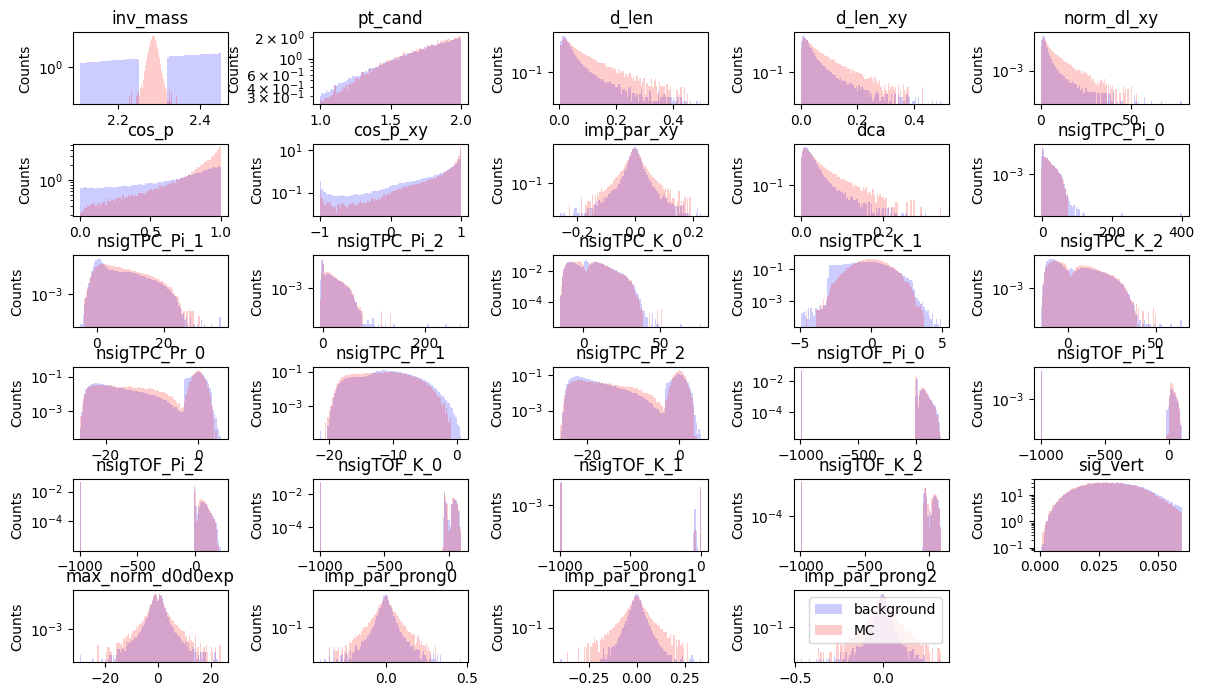

In [7]:

# Define labels and colors for the two datasets being plotted
leg_labels = ['background','MC']
colors = ['blue', 'red']


# Plot the distributions of the variables in vars_to_draw for the two datasets
# using plot_utils.plot_distr function
#plot_utils.plot_distr([bkgH, promptH, dataH, promptH2], vars_to_draw, bins=20, labels=leg_labels, colors=colors, log=True, density=True, figsize=(12, 7), alpha=0.3, grid=False)
plot_utils.plot_distr([bkgH,promptH], vars_to_draw, bins=100, labels=leg_labels, colors=colors, log=True, density=True, figsize=(12, 7), alpha=0.2, grid=False)
# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99, top=0.96, hspace=0.55, wspace=0.55)

# Show the plot
plt.show()

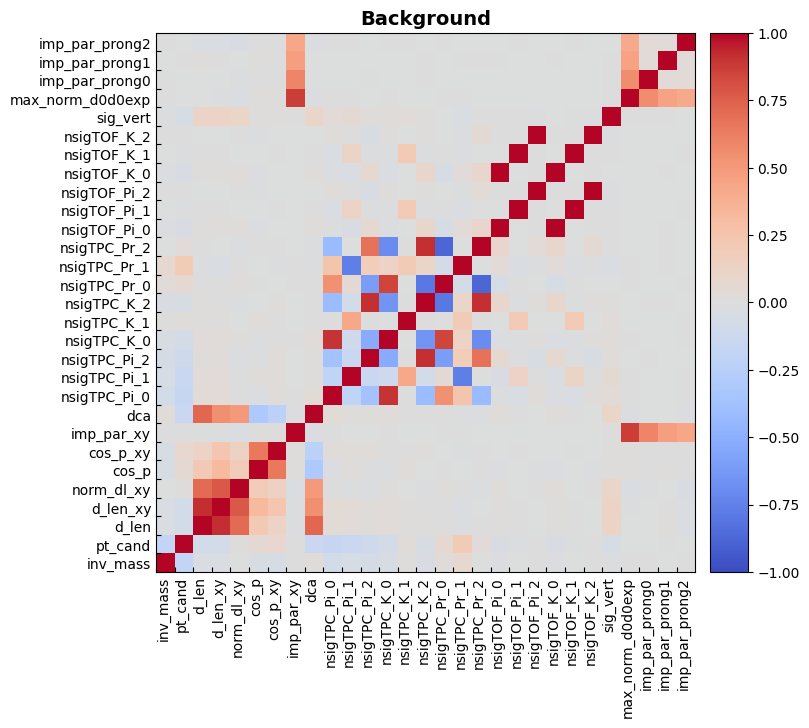

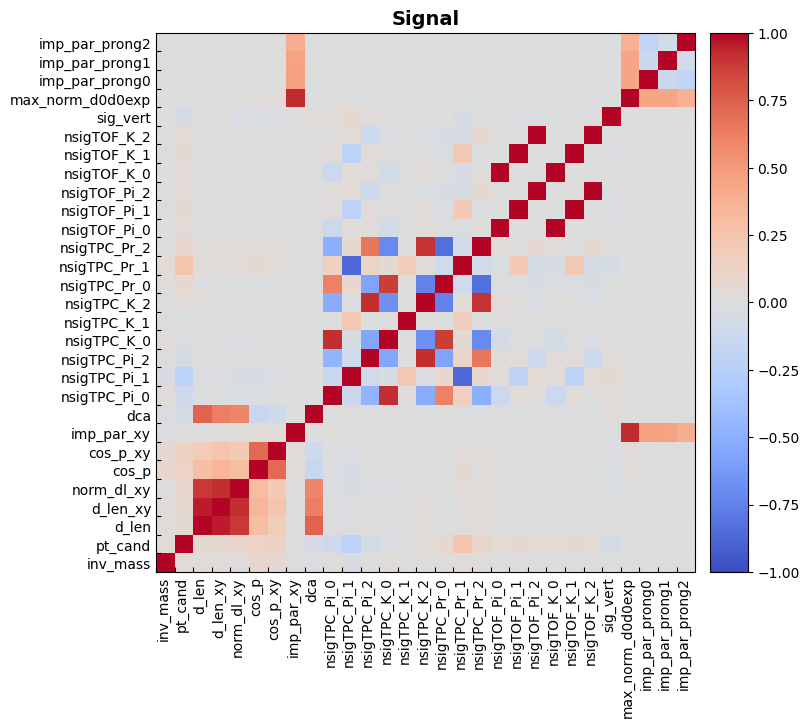

<Figure size 200x200 with 0 Axes>

In [8]:
plot_utils.plot_corr([bkgH, promptH], vars_to_draw, ["Background","Signal"])
fig = plt.figure(figsize=(2, 2))
plt.show()

In [9]:
features_for_train = vars_to_draw.copy()

features_for_train.remove('inv_mass')
features_for_train.remove('pt_cand')
#features_for_train.remove('cand_type')
# features_for_train.remove('pt_prong0')
# features_for_train.remove('pt_prong1')
# features_for_train.remove('pt_prong2')
# features_for_train.remove('sig_vert') 
# features_for_train.remove('imp_par_prong1')
# features_for_train.remove('imp_par_prong0')
# features_for_train.remove('imp_par_prong2')
# features_for_train.remove('cos_p')
# features_for_train.remove('max_norm_d0d0exp')
# features_for_train.remove('dca')
# features_for_train.remove('imp_par_xy')

In [13]:
n_estimators=243 
max_depth=2
learning_rate=0.045



In [14]:
model_clf = xgb.XGBClassifier()
model_clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
model_hdl = ModelHandler(model_clf, features_for_train)

In [15]:
import time

In [12]:
start_time = time.time()
hyper_pars_ranges = {'n_estimators': (200, 400), 'max_depth': (
    2, 5), 'learning_rate': (0.01, 0.1)}
model_hdl.optimize_params_optuna(train_test_data, hyper_pars_ranges, cross_val_scoring='roc_auc', timeout=120,
                                 n_jobs=-1, n_trials=5, direction='maximize')

# Capture the end time
end_time = time.time()

# Calculate the total runtime in seconds
total_runtime = end_time - start_time

# Print the total runtime
print("Total runtime: {:.2f} seconds".format(total_runtime))

[I 2023-06-26 23:14:12,521] A new study created in memory with name: no-name-6277ac85-e1f4-4af0-94dd-fbf5e2cfb024
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-06-26 23:28:34,145] Trial 1 finished with value: 0.8432375424184768 and parame

KeyboardInterrupt: 

In [16]:
start_time = time.time()
model_hdl.train_test_model(train_test_data)
end_time = time.time()

# Calculate the total runtime in seconds
total_runtime = end_time - start_time

# Print the total runtime
print("Total runtime: {:.2f} seconds".format(total_runtime))

#with open('results.txt', 'a') as f:
  #  f.write("({}, {}, {}, {}, ".format(total_runtime, n_estimators, max_depth, learning_rate))

Training xgboost model for classification
Number of detected classes: 2
Training the model: ...
Training the model: Done!
Testing the model: ...
ROC_AUC_score: 0.844144
Testing the model: Done!
Total runtime: 153.66 seconds


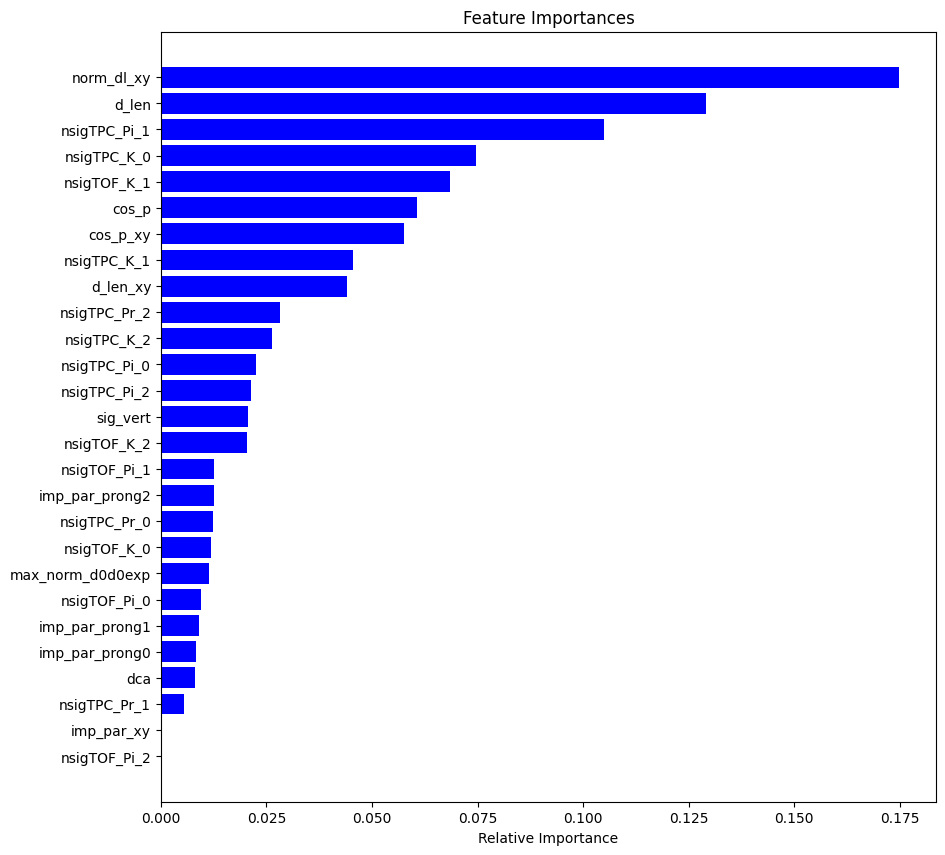

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Convert TreeHandler objects to pandas DataFrames
promptH_df = promptH.get_data_frame()
bkgH_df = bkgH.get_data_frame()

# Add target column
promptH_df['target'] = 1
bkgH_df['target'] = 0

# Combine the datasets
data = pd.concat([promptH_df, bkgH_df])

# Separate features and target
X = data[features_for_train]
y = data['target']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=44)


model = xgb.XGBRegressor(n_estimators=243, max_depth=2, learning_rate=0.045)


model.fit(X_train, y_train)


feature_importances = model.feature_importances_


indices = np.argsort(feature_importances)


plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_for_train[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

In [19]:
y_pred_train = model_hdl.predict(train_test_data[0], False)
y_pred_test = model_hdl.predict(train_test_data[2], False)

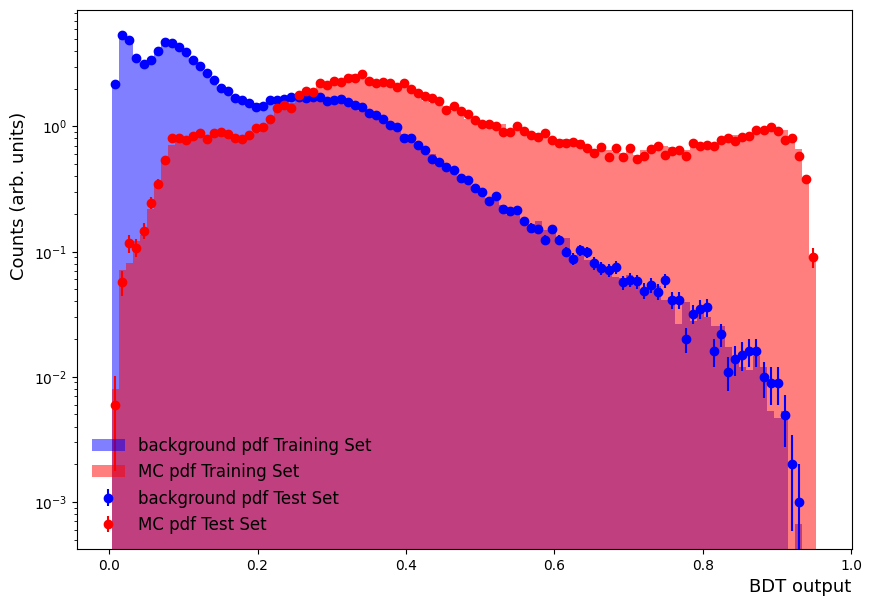

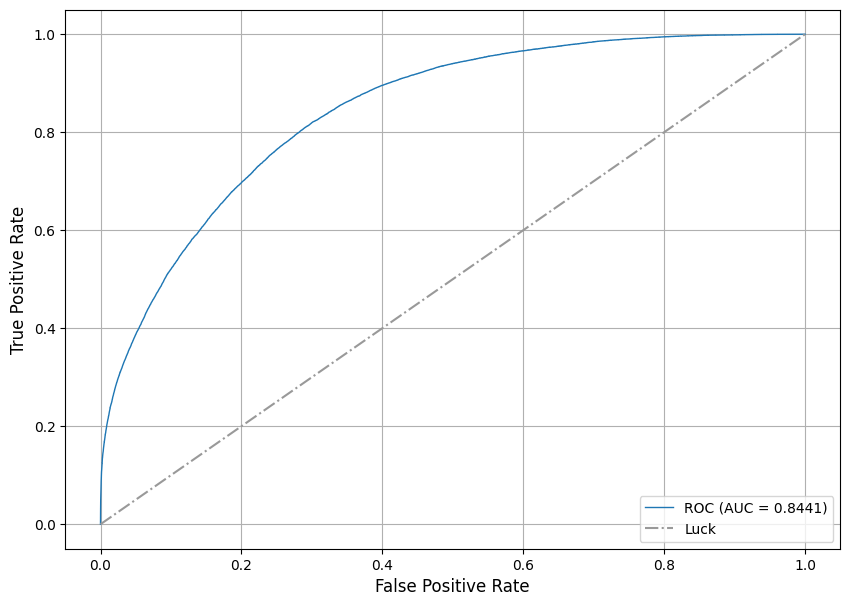

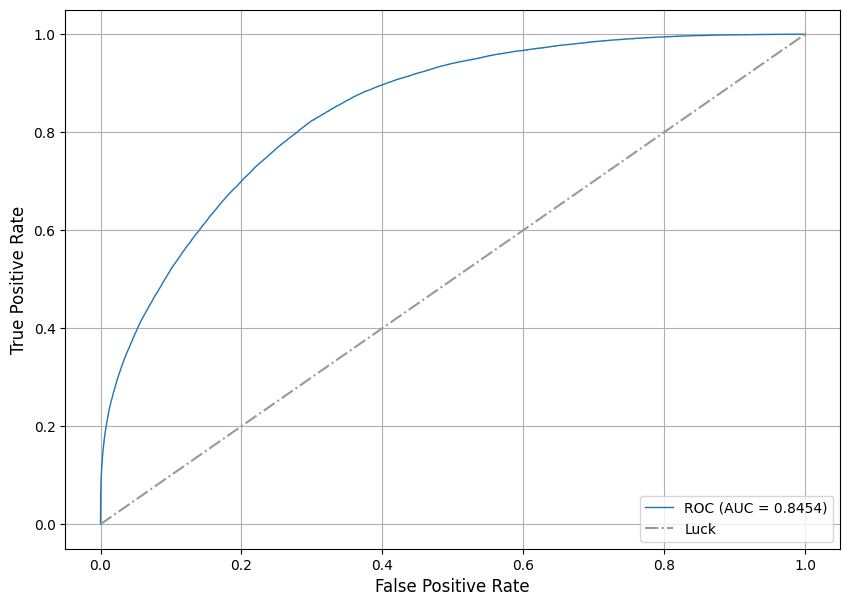

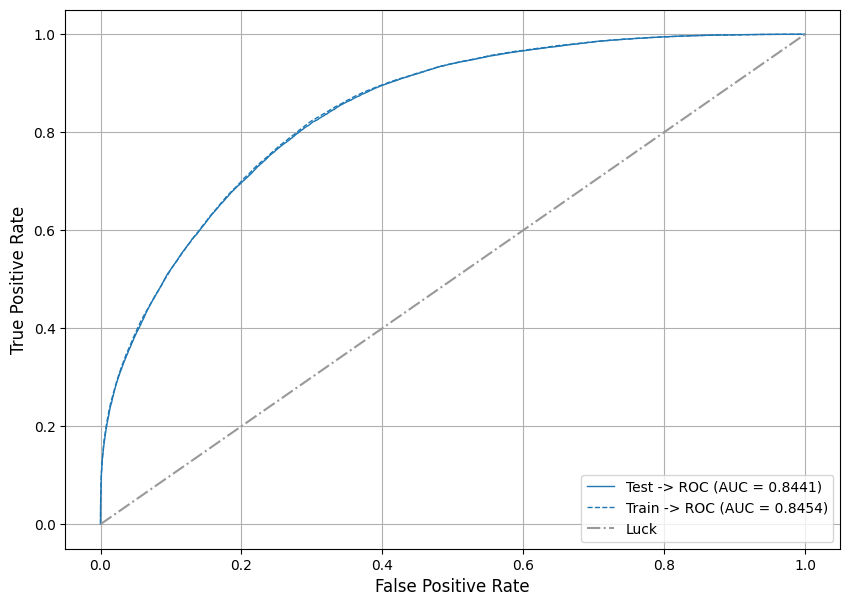

In [20]:
plt.rcParams["figure.figsize"] = (10, 7)

ml_out_fig = plot_utils.plot_output_train_test(model_hdl, train_test_data, 100, 
                                               False, leg_labels, True, density=True)

roc_train_test_fig = plot_utils.plot_roc_train_test(train_test_data[3], y_pred_test,
                                                    train_test_data[1], y_pred_train, None, leg_labels)
plt.show()

In [21]:
start_time = time.time()
dataH.apply_model_handler(model_hdl, False)
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime: {:.2f} seconds".format(total_runtime))



Total runtime: 88.77 seconds


In [ ]:
start_time = time.time()
promptH.apply_model_handler(model_hdl, False)
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime: {:.2f} seconds".format(total_runtime))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the TreeHandler to a DataFrame
df_2 = promptH.get_data_frame()
start = 0.1
end = 0.99  # we use 0.82 to ensure 0.8 is included, as the stop value in np.arange() is exclusive
step = 0.02

BDTArray = np.arange(start, end, step)
data_frame_after = []
data_frame_ratio = []

for i in range(len(BDTArray)):
    data_df = df_2[df_2['model_output'] > BDTArray[i]]
    data_frame_after.append(data_df)

    # Calculate the ratio of the number of data frames after model output cuts
    ratio = len(data_df) / len(df_2)
    data_frame_ratio.append(ratio)

# Plot the ratio as a function of BDT cut values
plt.plot(BDTArray, data_frame_ratio, marker='o')

# Add labels and title to the plot
plt.xlabel('BDT Cut')
plt.ylabel('Ratio')
plt.title('Ratio as a function of BDT Cut')

# Display the plot
plt.show()


In [25]:

# Convert the TreeHandler to a DataFrame
df_2 = dataH.get_data_frame()[['inv_mass', 'model_output']]

# Select only 'inv_mass' and 'model_output'
#df_2 = data_df[['inv_mass', 'model_output']]


# Create a new TreeHandler with the filtered DataFrame
#filtered_dataH = TreeHandler(filtered_df, None)

start = 0.1
end = 0.99 # we use 0.82 to ensure 0.8 is included, as the stop value in np.arange() is exclusive
step = 0.05

BDTArray = np.arange(start, end, step)


data_frame_after = [] 

for i in range(len(BDTArray)):
    data_df = df_2[df_2['model_output'] > BDTArray[i]]
    data_frame_after.append(data_df)
 


In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the 2D array
n = 10  # Number of rows
m = 10  # Number of columns

# Create subplots with specified dimensions
fig, axs = plt.subplots(n, m, figsize=(12, 8))

# Flatten the axs array to iterate over it
axs = axs.flatten()

# Plot each DataFrame
for i, data_df in enumerate(data_frame_after):
    print(i)
    counts = data_df['inv_mass'].value_counts()
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f"Plot {i+1}")
    axs[i].set_xlabel('inv_mass')
    axs[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(len(data_frame_after), n * m):
    axs[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



In [26]:
BDTArray_np = np.array(BDTArray)
BDTArray_int = (BDTArray_np * 100).astype(int)
print(len(BDTArray_int),len(BDTArray),len(data_frame_after))

18 18 18


In [ ]:
#n_entries_original = dataH.get_n_cand()


BDTArray = [0.3]

selected_data_hndl_array = [] # Initialize an empty list
data_frame_after = []
for i in range(len(BDTArray)):
    selected_data_hndl = dataH.get_subset(f'model_output > {BDTArray[i]}')
    selected_data_hndl_array.append(selected_data_hndl) # Add the selected data to the list
 
for i in range(len(selected_data_hndl_array)):
    data_frame_after.append(selected_data_hndl_array[i]._full_data_frame)
    print(i)


In [27]:
import ROOT
import pandas as pd

hist_array = []  # Initialize an empty list for histograms
# Create a canvas to hold the histograms
#canvas = ROOT.TCanvas("canvas", "Histograms", 800, 600)
#canvas.Divide(10, 10)  # Divide the canvas into a grid
file = ROOT.TFile("output_final_kashmir.root", "RECREATE")

# Create a ROOT histogram for data_frame_before
#hist = ROOT.TH1F("inv_mass_MB", "Histogram of inv_mass;inv_mass;Frequency", 100, data_frame_before['inv_mass'].min(), data_frame_before['inv_mass'].max())

# Fill the histogram with DataFrame column values
#for value in data_frame_before['inv_mass']:
   # hist.Fill(value)

# Loop over each dataframe in data_frame_after
for j in range(len(data_frame_after)):
    print(j)
    # Create a ROOT histogram for the current dataframe
    
    hist1 = ROOT.TH1F(f"inv_mass_{BDTArray_int[j]}", "Histogram of inv_mass;inv_mass;Frequency", 100, data_frame_after[j]['inv_mass'].min(), data_frame_after[j]['inv_mass'].max())
   
    
    # Fill the histogram with DataFrame column values
    for value in data_frame_after[j]['inv_mass']:
        hist1.Fill(value)
    
    # Add the histogram to the list
    hist_array.append(hist1)
    hist1.Write()

        

# Close the ROOT file
file.Close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


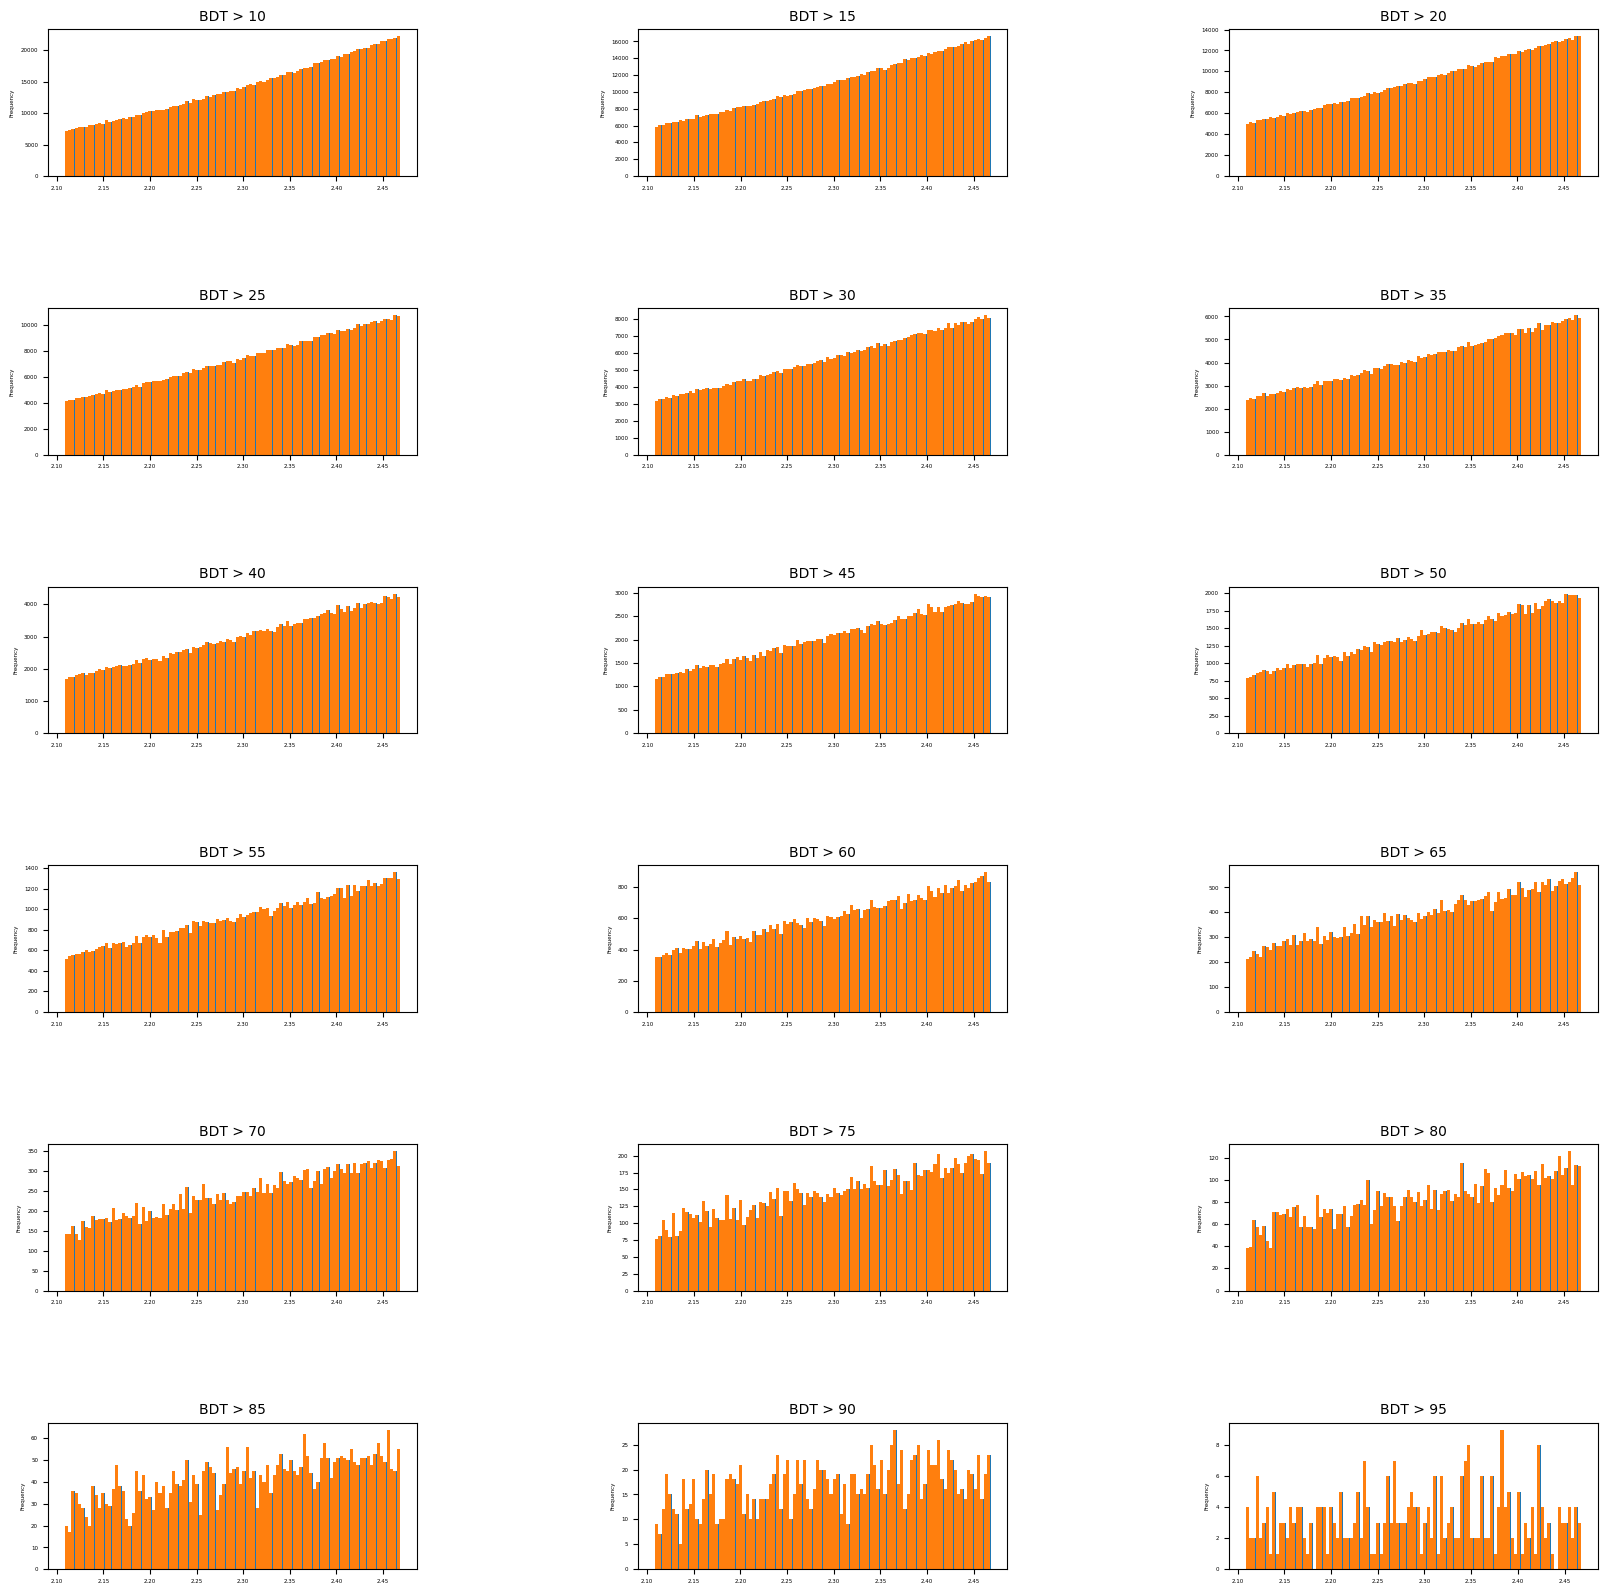

In [30]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

hist_array = []  # Initialize an empty list for histograms
file = ROOT.TFile("output_child2_1_kashmir.root", "READ")

# Define the dimensions of the grid
m = 6  # Number of rows
n = 3 # Number of columns

# Create a Matplotlib figure and axis for the subplots
fig, axs = plt.subplots(m, n, figsize=(20, 20))

# Loop over each dataframe in data_frame_after
for j in range(len(data_frame_after)):
    hist_name = f"inv_mass_{BDTArray_int[j]}"
    hist = file.Get(hist_name)  # Get the histogram from the ROOT file

    # Convert the ROOT histogram to a NumPy array
    n_bins = hist.GetNbinsX()
    x = np.zeros(n_bins)
    y = np.zeros(n_bins)
    for i in range(n_bins):
        x[i] = hist.GetBinCenter(i + 1)
        y[i] = hist.GetBinContent(i + 1)

    # Determine the subplot index
    row = j // n
    col = j % n

    # Plot the histogram in the corresponding subplot
    axs[row, col].bar(x, y, align='edge', width=hist.GetBinWidth(1))

    # Add labels and title to the subplot
    axs[row, col].set_xlabel('', fontsize=4)
    axs[row, col].set_ylabel('Frequency', fontsize=4)
    axs[row, col].set_title(f'BDT > {BDTArray_int[j]}', fontsize=10)

    # Adjust the width of the bars
    axs[row, col].bar(x, y, align='edge', width=0.9 * hist.GetBinWidth(1))
    axs[row, col].tick_params(axis='x', labelsize=4)
    axs[row, col].tick_params(axis='y', labelsize=4)
# Manually adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6, hspace=0.9)

# Display the plot
plt.show()

# Close the ROOT file
file.Close()

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Define fit function
def fit_function(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1*x + p2*x**2 + p3*np.exp(-0.5*((x-p4)/p5)**2)

def poly2(x, p0, p1, p2):
    return p0 + p1*x + p2*x**2

def gaussian(x, p3, p4, p5):
    return p3*np.exp(-0.5*((x-p4)/p5)**2)

# Open the ROOT file
file = ROOT.TFile("output_child2_1_kashmir.root", "READ")

# Get the list of keys in the file
keys = file.GetListOfKeys()

# Define the dimensions of the grid
m = 20  # Number of rows
n =  5  # Number of columns

# Create a Matplotlib figure and axis for the subplots
fig, axs = plt.subplots(m, n, figsize=(20, 20))

# Loop over all keys
for i, key in enumerate(keys):
    # Get the histogram
    hist = file.Get(key.GetName())

    # define a function f as a sum of poly2 and gaussian
    poly = ROOT.TF1("poly", "[0] + [1]*x + [2]*x*x", hist.GetXaxis().GetXmin(), hist.GetXaxis().GetXmax())

    # you can set the initial parameters of the function, if you know them
    poly.SetParameters(0, 0, 0)

    # fit the histogram to the side bands
    center = (hist.GetXaxis().GetXmax() + hist.GetXaxis().GetXmin()) / 2
    epsilon = 0.1 * (hist.GetXaxis().GetXmax() - hist.GetXaxis().GetXmin())
    low_sideband = [center - 2*epsilon, center - epsilon]
    high_sideband = [center + epsilon, center + 2*epsilon]

    hist.Fit(poly, "R+", "goff", *low_sideband)
    hist.Fit(poly, "R+", "goff", *high_sideband)

    # Subtract the polynomial fit from the histogram
    for j in range(1, hist.GetNbinsX()+1):
        hist.AddBinContent(j, -poly.Eval(hist.GetBinCenter(j)))

    # fit a Gaussian to the residuals
    gaus = ROOT.TF1("gaus", "[0]*exp(-0.5*((x-[1])/[2])**2)", -4, 4)
    gaus.SetParameters(1, 2.32, 0.06)  # initial guess for the parameters: amplitude = 1, mean = 2.32, sigma = 0.06
    hist.Fit(gaus, "R")

    # Extract bin content and bin centers
    y = [hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)]
    x = [hist.GetBinCenter(i) for i in range(1, hist.GetNbinsX() + 1)]

    # Create an array of x values for the plot
    x_values = np.linspace(hist.GetXaxis().GetXmin(), hist.GetXaxis().GetXmax(), 1000)

    # Get the fitted parameters
    parameters = [gaus.GetParameter(i) for i in range(gaus.GetNpar())]

    # Calculate the y values for the plot
    y_values = gaussian(x_values, *parameters)

    # Define which subplot to draw on
    ax = axs[i // n, i % n]

    # Create the plot
    ax.hist(x, bins=100, weights=y, range=(hist.GetXaxis().GetXmin(), hist.GetXaxis().GetXmax()), color='blue', alpha=0.6)
    ax.plot(x_values, y_values, color='red')

# Close the ROOT file
file.Close()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
for i in range(len(BDTArray)):
    data_df = df_2[df_2['model_output'] > BDTArray[i]]
    print(data_df.shape)  # This will print the number of rows and columns in data_df
    data_frame_after.append(data_df)

In [ ]:
dataH3= TreeHandler('mergedAnalysisResults_final_PID_geometry.root', 'treeMLLc_new')

In [ ]:
start_time = time.time()
dataH3.apply_model_handler(model_hdl, False)
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime: {:.2f} seconds".format(total_runtime))